In [1]:
using Gadfly

In [2]:
# Incorrect Solutin
# Do not use
function f(z, ϕ)
    n = floor(1 / ϕ)  
    R = 0.0
    for q = 2:n
        R = R + z^q / factorial(q)  
    end
    z * exp(-z) * R 
end

f (generic function with 1 method)

In [3]:
function g(z, ϕ)
    n = floor(1 / ϕ)  
    R = 0.0
    for k = 1:n
        R = R + (k - 1) * (k / z) * ((z^k * exp(-z)) / factorial(k))  
    end
    R
end

g (generic function with 1 method)

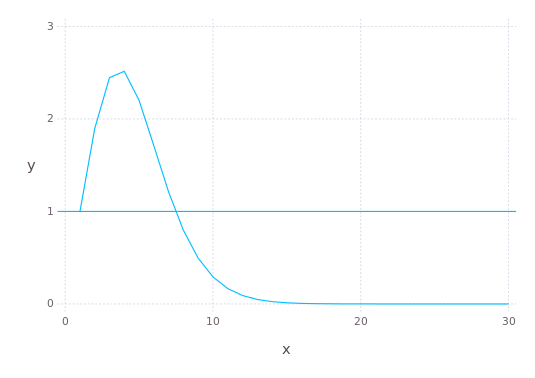

In [4]:
plot(x = [z for z = 1:1:30], y = [g(z, 0.15) for z = 1:1:30], 
    yintercept = [1], Geom.line, Geom.hline)

In [13]:
Z = [x for x = 1:1:16]
Φ = [x for x = .1:.01:.26]
A = zeros(Int, length(Z), length(Φ))
za = Int[]
ϕa = Float64[]
ca = Int[]
i = 1
for ϕ in Φ, rev = true, z in sort(Z, rev = true)
    push!(za, z)
    push!(ϕa, ϕ)
    if g(z, ϕ) > 1 
        A[i] = 1
        push!(ca, 1)
    else
        push!(ca, 0)
    end
    i = i + 1    
end

In [15]:
df = DataFrame(ϕ = ϕa, z = za, fill = ca);

In [23]:
set_default_plot_size(12cm, 12cm)

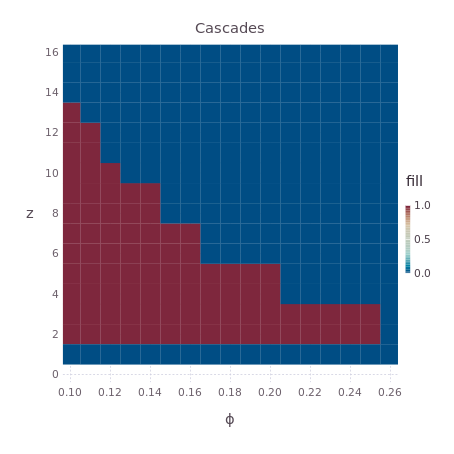

In [24]:
plot(df, x = "ϕ", y = "z", color = "fill", Geom.rectbin, 
Coord.cartesian(xmin=.1, xmax=.26, ymin=0, ymax=16),
Guide.title("Cascades"))

In [1]:
using Roots, Gadfly

In [2]:
function FPv(ϕ, x, z) 
    tot = 0.0
    for k in 0:floor(1 / ϕ)
        tot = tot + (z^k / factorial(k) * exp(-z) * x^k)
    end
    tot
end

FPv (generic function with 1 method)

In [3]:
function dFPv(ϕ, x, z) 
    tot = 0.0
    for k in 0:floor(1 / ϕ)
        tot = tot + (k * z^k / factorial(k) * exp(-z) * x^(k - 1))
    end
    tot
end

dFPv (generic function with 1 method)

In [4]:
function FRv(ϕ, x, z)
    tot = 0.0
    for k in 0:floor(1 / ϕ)
        tot = tot + (k / z) * (z^k / factorial(k)) * exp(-z) * x^(k - 1) 
    end
    tot
end

FRv (generic function with 1 method)

In [5]:
function Fρ(ϕ, x, z)
    1 - FRv(ϕ, 1, z) + FRv(ϕ, x, z) - x
end

Fρ (generic function with 1 method)

In [6]:
function Fπ(ϕ, x, z)
    fρ(y) = Fρ(ϕ, y, z) 
    root = fzero(fρ, .1)
    1 - FPv(ϕ, x, z) + (x * FPv(ϕ, root, z))
end

Fπ (generic function with 1 method)

In [7]:
function getπ(ϕ)
    π = Float64[]
    for k in 1:.1:8
        r = Fπ(ϕ, 1, k)
        push!(π, r)
        #print("$r\n")
    end
    π
end

getπ (generic function with 1 method)

In [8]:
FP(x, z) = exp(z * (x - 1))

FP (generic function with 1 method)

In [9]:
function Fπt(ϕ, x, z)
    fρ(y) = Fρ(ϕ, y, z) 
    root = fzero(fρ, .1)
    #print("$root\n")
    FP(root, z)
end

Fπt (generic function with 1 method)

In [10]:
function getπt(ϕ)
    πt = Float64[]  
    for k in 1:.1:8
        t = Fπt(ϕ, 1, k) 
        push!(πt, t)
        #print("$t\n")
    end
    πt
end

getπt (generic function with 1 method)

In [11]:
using DataFrames

In [17]:
df = DataFrame(k = [k for k = 1:.1:8], Triggering = 1 - getπt(0.18), Vulnerable = 1 - getπ(0.18));

In [18]:
dfs = stack(df, [:Vulnerable, :Triggering]);

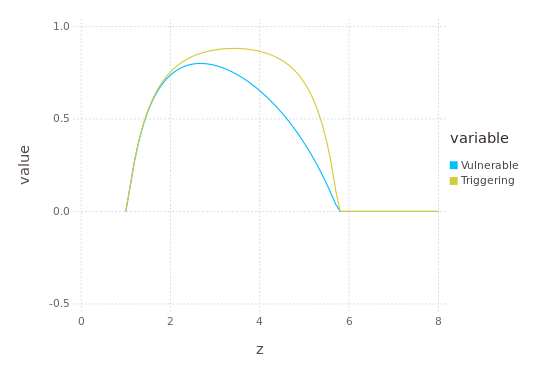

In [19]:
plot(dfs, x = "k", y = "value", color = "variable", Geom.line,
Guide.xlabel("z"))

In [15]:
plot(layer(x = [k for k = 1:8], y = 1 - getπ(0.18), Geom.line),

LoadError: LoadError: syntax: incomplete: premature end of input
while loading In[15], in expression starting on line 1

In [16]:
plot(x = [k for k = 1:8], y = 1 - getπt(0.18), Geom.line)

ErrorException: The following aesthetics are required by Geom.line to be of equal length: x, y
